#### <b> Alpha Leonis </b>

In [1]:
from polytrope_model import *
import numpy as np

In [2]:
#Sol
M_sol = 1.988475e33
L_sol = 3.828e33
R_sol = 6.957e10
Z_sol = 0.02857
Y_sol = 0.28

#%%
# Epsilon Eridani
M_e = 0.82 * M_sol
dM_e = 0.02 * M_sol
R_e = 0.738 * R_sol
dR_e= 0.0003 * R_sol
L_e = 0.32 * L_sol
dL_e = 0.01 * L_sol
metal_e = -0.08
dmetal_e = 0.01
Z_e = Z_sol*10**metal_e
Y_e = 0.2423
dY_e = 0.0054
total_time_e = 2*4.6*M_e*(1/L_e)


#Alpha Leonis
M_a = 3.44 * M_sol
dM_a = 0.045 * M_sol # -0.01, +0.08
R_a =  3.65 * R_sol # 4.16 (equatorial) + 3.14 (polar) / 2
dR_a = 0.05* M_sol # sqrt((0.08/2)^2 + (0.06/2)^2)
L_a = 314 * L_sol
dL_a = 36 * L_sol
metal_a = 0.21
dmetal_a = 0.05 # assumed value
Z_a = Z_sol*10**metal_a
Y_a = 0.2423
dY_a = 0.0054
total_time_a = 2*4.6*M_a*(1/L_a)


In [3]:
def monte_carlo(M, dM, R, dR, L, dL, Z_X, dZ_X, Y, dY, r_n, d_c, tau, tau_t, N, L_sol,a,b):
    nn = np.zeros(N)
    Mm = M + dM*np.random.normal(0, 1, N)
    Rr = R + dR*np.random.normal(0, 1, N)
    Ll = L + dL*np.random.normal(0, 1, N)
    Z_Xx = Z_X + dZ_X*np.random.normal(0, 1, N)
    Yy = Y + dY*np.random.normal(0, 1, N)
    for i in range(N):
        print(i)
        nn[i] = index(y, a, b, Mm[i], Ll[i], Yy[i], Z_Xx[i], Rr[i], r_n, d_c, tau, tau_t, L_sol)
    return nn

/Users/rodrigocastro/Desktop/Computational_Astronomy/polytrope_model.py:36: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)


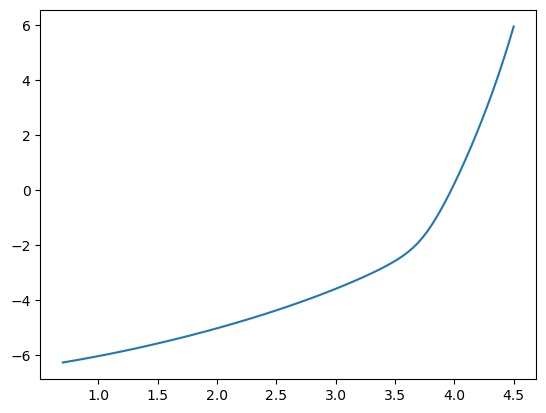

In [4]:
valores = np.linspace(0.7, 4.5, 100)
Xs = (1-Y_a)/(1+Z_a)
Z = 1-Y_a-Xs
yy = [y(i, Xs, 0.2, 0.03, R_a, total_time_a/3, total_time_a, M_a, Z, L_sol, L_a) for i in valores]
plt.plot(valores, yy)

In [5]:
yy

[-6.267015459627789,
 -6.23948458416259,
 -6.210863015457668,
 -6.182118400784081,
 -6.152391825297658,
 -6.1226267569207735,
 -6.091984198425584,
 -6.06051512431147,
 -6.029140836999049,
 -5.99703857583703,
 -5.964267834117017,
 -5.930882246842776,
 -5.8969370648456065,
 -5.862485132506059,
 -5.8275785160322595,
 -5.792267493938981,
 -5.755834325907773,
 -5.719873002202495,
 -5.682907932978976,
 -5.645010047000686,
 -5.606987678730069,
 -5.568166138571721,
 -5.529325790184212,
 -5.489812263086505,
 -5.449694968052989,
 -5.408370485875216,
 -5.367265303229021,
 -5.325761938220367,
 -5.283278110401018,
 -5.240545806725167,
 -5.19700103716819,
 -5.152736027048254,
 -5.10843997748684,
 -5.062985939071142,
 -5.017650672626561,
 -4.970773001708207,
 -4.924178448351977,
 -4.87681191704286,
 -4.828235023742387,
 -4.779647818686439,
 -4.730073773694592,
 -4.680150626498596,
 -4.629476407910725,
 -4.577671758704135,
 -4.525855962970803,
 -4.4731621889375175,
 -4.419267283625828,
 -4.36524576068

In [6]:
poly_index_a = index(y, 1.2, 4.5, M_a, L_a, Y_a, Z_a, R_a, L_sol, 0.2, 0.03, total_time_a/3, total_time_a)
poly_index_a

3.973196490594592

In [7]:
Xs = (1-Y_sol)/(1+Z_sol)
Z = 1-Y_sol-Xs
xi, y1, y2 = lane_emden_solver(poly_index_a)
X = chemical_composition(xi, Xs, 0.2, 0.03, total_time_e/2, total_time_e)

In [8]:
lane_emden_solver(3.5)

(array([0.00000000e+00, 1.00000000e-07, 4.00103999e-04, ...,
        9.53529543e+00, 9.53569543e+00, 9.53580443e+00]),
 array([1.00000000e+00, 1.00000000e+00, 9.99999953e-01, ...,
        1.05830575e-05, 2.26603623e-06, 0.00000000e+00]),
 array([ 0.00000000e+00, -1.00000000e-07, -1.33367985e-04, ...,
        -2.07932174e-02, -2.07914729e-02, -2.07897287e-02]))

In [9]:
nn = monte_carlo(M_a, dM_a, R_a, dR_a, L_a, dL_a, Z_a, dmetal_a, Y_a, dY_a, 0.2, 0.03, total_time_a / 2, total_time_a, 1000, L_sol, a=1, b=4.5)

0


/Users/rodrigocastro/Desktop/Computational_Astronomy/polytrope_model.py:171: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(lumin/(L/L_sol)) # calculates the index in relativa units relative to the sun's luminosity


ValueError: f(a) and f(b) must have different signs